In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from importlib import reload
import os
from comet_ml import Experiment

In [12]:
df = pd.read_csv('data/archive.zip')

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Соотношение людей, которые пропускают приёмы, к тем, кто этого не делает

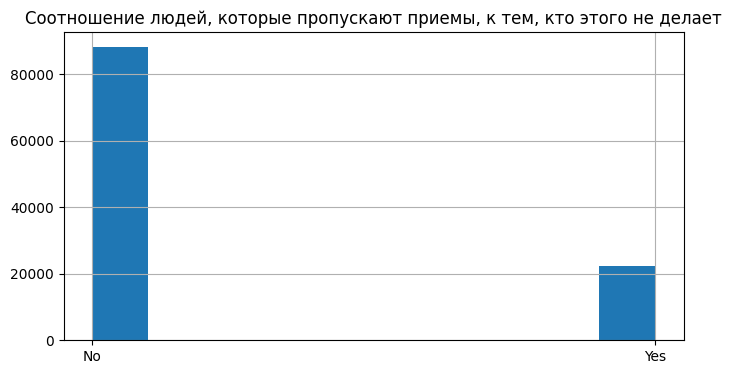

In [14]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

### Получить точную пропорцию

In [5]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

### кто не появляется чаще — мужчины или женщины

In [15]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

 столбцы ‘Gender’ и ‘Neighbourhood’ представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. 

In [16]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

**НАСТРОЙКА УРОВНЯ ЛОГИРОВАНИЯ**

In [9]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


 Другой вариант сбросить настройки logging 

In [2]:
reload(logging)

<module 'logging' from 'c:\\Python310\\lib\\logging\\__init__.py'>

необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера

In [3]:
logging.basicConfig(level=logging.DEBUG)

**УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ**

In [4]:
logging.FileHandler('log_file.log')

<FileHandler c:\Users\insps\Documents\SF\SF_DS_learn\log_file.log (NOTSET)>

**УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ**

In [ ]:
reload(logging)
 
# logging.basicConfig(
#     format="%(levelname)s: %(asctime)s: %(message)s",
#     level=logging.DEBUG
# )
# logging.info('Check')

DEBUG: 2023-02-11 04:54:18,759: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-02-11 04:54:18,768: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-02-11 04:54:18,838: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-02-11 04:54:18,852: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-02-11 04:54:18,859: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-02-11 04:54:18,877: Found nothing--returning NO_VALUE


<module 'logging' from 'c:\\Python310\\lib\\logging\\__init__.py'>

DEBUG: 2023-02-11 04:54:29,056: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-02-11 04:54:29,060: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-02-11 04:54:29,063: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-02-11 04:54:29,065: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-02-11 04:54:29,068: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-02-11 04:54:29,070: Found nothing--returning NO_VALUE
DEBUG: 2023-02-11 04:54:37,558: Looking up key: reporting, namespace: ['comet', 'internal']
DEBUG: 2023-02-11 04:54:37,566: Searching <ConfigOSEnv> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:54:37,570: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:54:37,574: Searching <ConfigDictEnv: {}> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:54:37,580: 

In [17]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [6]:
!mkdir logs

In [18]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info(f"Data shape {df.shape}")

logger.info(f"Percentage of women: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]}")

logger.info(f"Percentage of men: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]}")

INFO: 2023-02-10 21:20:32,763: Data
INFO: 2023-02-10 21:20:32,768: Data shape (110527, 14)
INFO: 2023-02-10 21:20:32,803: Percentage of women: 0.653882342398853
INFO: 2023-02-10 21:20:32,845: Percentage of men: 0.346117657601147


In [ ]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

In [ ]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="Qn2d7ZHd4Z78Hg5fyeWmwbeJs",
    project_name="medical-appointment",
    workspace="elenabask",
)

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


DEBUG: 2023-02-11 04:55:39,691: Looking up key: reporting, namespace: ['comet', 'internal']
DEBUG: 2023-02-11 04:55:39,697: Searching <ConfigOSEnv> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:55:39,699: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:55:39,703: Searching <ConfigDictEnv: {}> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:55:39,706: Found nothing--returning NO_VALUE
DEBUG: 2023-02-11 04:55:39,865: https://www.comet.com:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG: 2023-02-11 04:55:39,873: Looking up key: reporting, namespace: ['comet', 'internal']
DEBUG: 2023-02-11 04:55:39,875: Searching <ConfigOSEnv> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:55:39,878: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:55:39,881: Searching <ConfigDictEnv: {}> for COMET_INTERNAL_REPORTING
DEBUG: 2023-02-11 04:55:39,885: Found nothing--returning NO_VALUE
DEBUG: 2023-02-11 04:55:40,030: htt

In [ ]:
df.hist(figsize=(16,14));
experiment.log_figure(figure=plt)